In [2]:
import osmnx as ox
import networkx as nx

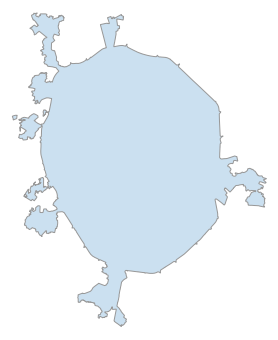

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82c0e77f28>)

In [2]:
city = ox.gdf_from_place('Moscow, Russia')
ox.plot_shape(ox.project_gdf(city))

### Street network from lat-long coordinates

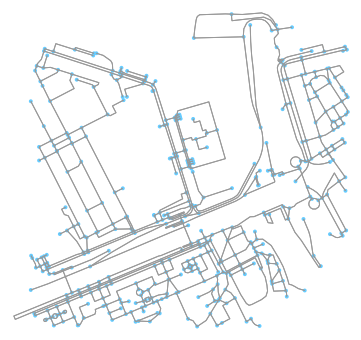

(<Figure size 817.17x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82be3dbeb8>)

In [12]:
# current location is obtained from
# https://www.latlong.net/
latitude = 55.740662
longtitude = 37.531103

G = ox.graph_from_point((latitude, longtitude), distance=400, network_type='walk')
ox.plot_graph(G)

### Street network from address

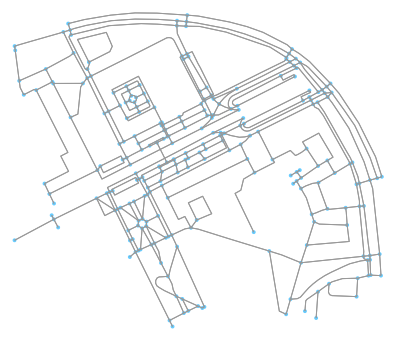

(<Figure size 898.982x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82a0a72780>)

In [23]:
G = ox.graph_from_address('32b Kutuzovsky Ave, Moscow, Russia', distance=400, network_type='walk')
ox.plot_graph(G)

### Street netwrok from place name

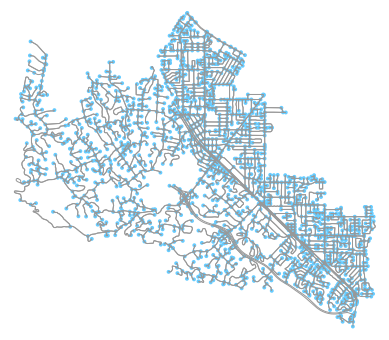

(<Figure size 625.437x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8245bb4438>)

In [26]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

### Computing the shortest route

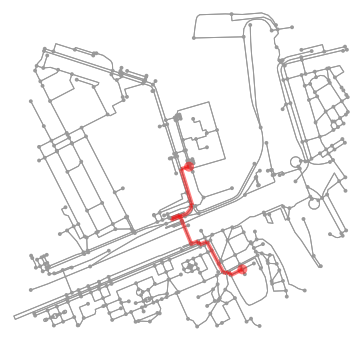

In [43]:
# map_graph = ox.graph_from_place('Berkeley, California', network_type='drive')
# map_graph = ox.graph_from_address('32b Kutuzovsky Ave, Moscow, Russia', distance=800, network_type='walk')
map_graph = ox.graph_from_point((latitude, longtitude), distance=400, network_type='walk')

origin = ox.get_nearest_node(map_graph, (latitude, longtitude))
destination = list(map_graph.nodes())[-1]

shortest_path = nx.shortest_path(map_graph, origin, destination, weight='length')
fig, ax = ox.plot_graph_route(map_graph, shortest_path)

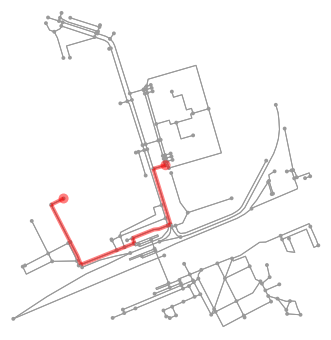

In [7]:
latitude = 55.740662
longtitude = 37.531103
map_graph = ox.graph_from_point((latitude, longtitude), distance=250, network_type='walk')

origin = ox.get_nearest_node(map_graph, (latitude, longtitude))
# destination = list(map_graph.nodes())[-1]
destination = ox.get_nearest_node(map_graph, (55.740008, 37.528892))

shortest_path = nx.shortest_path(map_graph, origin, destination, weight='length')
fig, ax = ox.plot_graph_route(map_graph, shortest_path)

### Analyse street networks

In [55]:
# G = ox.graph_from_place('Santa Monica, California', network_type='walk')
G = ox.graph_from_point((latitude, longtitude), distance=400, network_type='walk')

basic_stats = ox.basic_stats(G)
extended_stats = ox.extended_stats(G)
# print(extended_stats['betweenness_centrality_avg'])

In [53]:
basic_stats

{'n': 457,
 'm': 1236,
 'k_avg': 5.409190371991247,
 'intersection_count': 385,
 'streets_per_node_avg': 2.859956236323851,
 'streets_per_node_counts': {0: 0, 1: 72, 2: 0, 3: 309, 4: 72, 5: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1575492341356674,
  2: 0.0,
  3: 0.6761487964989059,
  4: 0.1575492341356674,
  5: 0.0087527352297593},
 'edge_length_total': 45188.01599999998,
 'edge_length_avg': 36.55988349514561,
 'street_length_total': 22638.868999999995,
 'street_length_avg': 36.51430483870967,
 'street_segments_count': 620,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0867544969468852,
 'self_loop_proportion': 0.003236245954692557,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [58]:
for key in extended_stats:
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
degree_centrality
degree_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
pagerank
pagerank_max_node
pagerank_max
pagerank_min_node
pagerank_min
